In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
erp = pd.read_csv("erp.csv")
erp = erp.loc[erp['onsale_web'] == 1]
erp = pd.DataFrame(erp)
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
787,6930,1,8.4,83,instock
792,7023,1,27.5,15,instock
793,7025,1,69.0,2,instock
822,7247,1,54.8,23,instock


In [3]:
web = pd.read_csv("web.csv")
web = web.drop(columns=['virtual', 'downloadable','rating_count','average_rating','tax_class','post_content','post_password','post_content_filtered','post_parent','menu_order','comment_count'])
web = web.loc[web['post_type'] == 'product']
web = pd.DataFrame(web)
web.index = web['sku']
web=web.drop(columns=['sku'])

web

,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
sku,,,,,,,,,,,,,,,,
bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15891,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15887,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [4]:
product_id = pd.DataFrame(web['guid'].str[-4:])
changing_column_names = product_id.set_axis(['product_id'], axis=1, inplace=False)
product_id = pd.DataFrame(changing_column_names)
product_id = product_id.astype({"product_id": int})
product_id

,product_id
sku,
bon-cadeau-25-euros,4954
15298,3847
15296,3849
15300,3850
19814,4032
...,...
16135,6930
15891,7023
15887,7025


In [5]:
merge_df= pd.merge(product_id, web, left_on='sku', right_on='sku')
merge_df = merge_df.drop_duplicates(subset=['product_id'], keep='first')

merge_df

,product_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
sku,,,,,,,,,,,,,,,,,
bon-cadeau-25-euros,4954,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15298,3847,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15296,3849,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15300,3850,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
19814,4032,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,6930,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15891,7023,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
15887,7025,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [6]:
merge_df.reset_index(inplace=True)
merge_df

,sku,product_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,4954,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,15298,3847,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,15296,3849,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,15300,3850,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,19814,4032,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,16135,6930,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
712,15891,7023,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
713,15887,7025,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
714,13127-1,7247,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [7]:
final_table= pd.merge(merge_df, erp, left_on='product_id', right_on='product_id')
final_table.index = final_table['product_id']
final_table=final_table.drop(columns=['product_id','tax_status','post_author','post_date_gmt','post_excerpt','post_status',
                                      'ping_status','comment_status','post_name','post_modified','post_modified_gmt','guid',
                                      'post_type','post_mime_type','onsale_web'])
final_table.sort_index()

final_table

,sku,total_sales,post_date,post_title,price,stock_quantity,stock_status
product_id,,,,,,,
4954,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,25.0,0,instock
3847,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,0,outofstock
3849,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0,outofstock
3850,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0,outofstock
4032,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,0,outofstock
...,...,...,...,...,...,...,...
6930,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,8.4,83,instock
7023,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,27.5,15,instock
7025,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,69.0,2,instock


In [8]:
revenue_per_product = ((final_table.groupby('product_id')['price'].sum()) * (final_table.groupby('product_id')['total_sales'].sum()))
revenue_per_product = pd.DataFrame(revenue_per_product)
revenue_per_product = revenue_per_product.set_axis(['Total CA / produit'], axis=1, inplace=False)
revenue_per_product

,Total CA / produit
product_id,
3847,145.2
3849,0.0
3850,0.0
4032,42.3
4039,0.0
...,...
6930,42.0
7023,0.0
7025,0.0


In [9]:
total_revenue = revenue_per_product['Total CA / produit'].sum()
total_revenue

70568.6

In [10]:
final_table.to_excel("final_table.xlsx")

In [11]:
final_table.describe()

,total_sales,price,stock_quantity
count,716.000000,716.000000,716.000000
mean,4.001397,32.581145,28.666201
std,8.508901,27.842942,47.969443
min,0.000000,5.200000,0.000000
25%,0.000000,14.100000,2.000000
50%,1.000000,23.650000,12.000000
75%,4.000000,42.300000,35.000000
max,96.000000,225.000000,578.000000


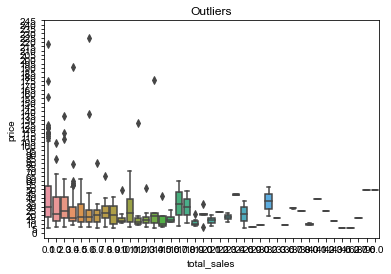

In [12]:
outliers=final_table[['total_sales','price']]
outliers=pd.DataFrame(outliers)

sns.boxplot(y='price', x='total_sales',data=outliers)
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 250, 5))
plt.ylabel('price')
plt.title('Outliers')
sns.set(rc={'figure.figsize':(30,18)})

In [13]:
def remove_outlier_IQR(outliers):
    Q1=outliers.quantile(0.25)
    Q3=outliers.quantile(0.75)
    IQR=Q3-Q1
    outliers_final=outliers[~((outliers<(Q1-1.5*IQR)) | (outliers>(Q3+1.5*IQR)))]
    return outliers_final

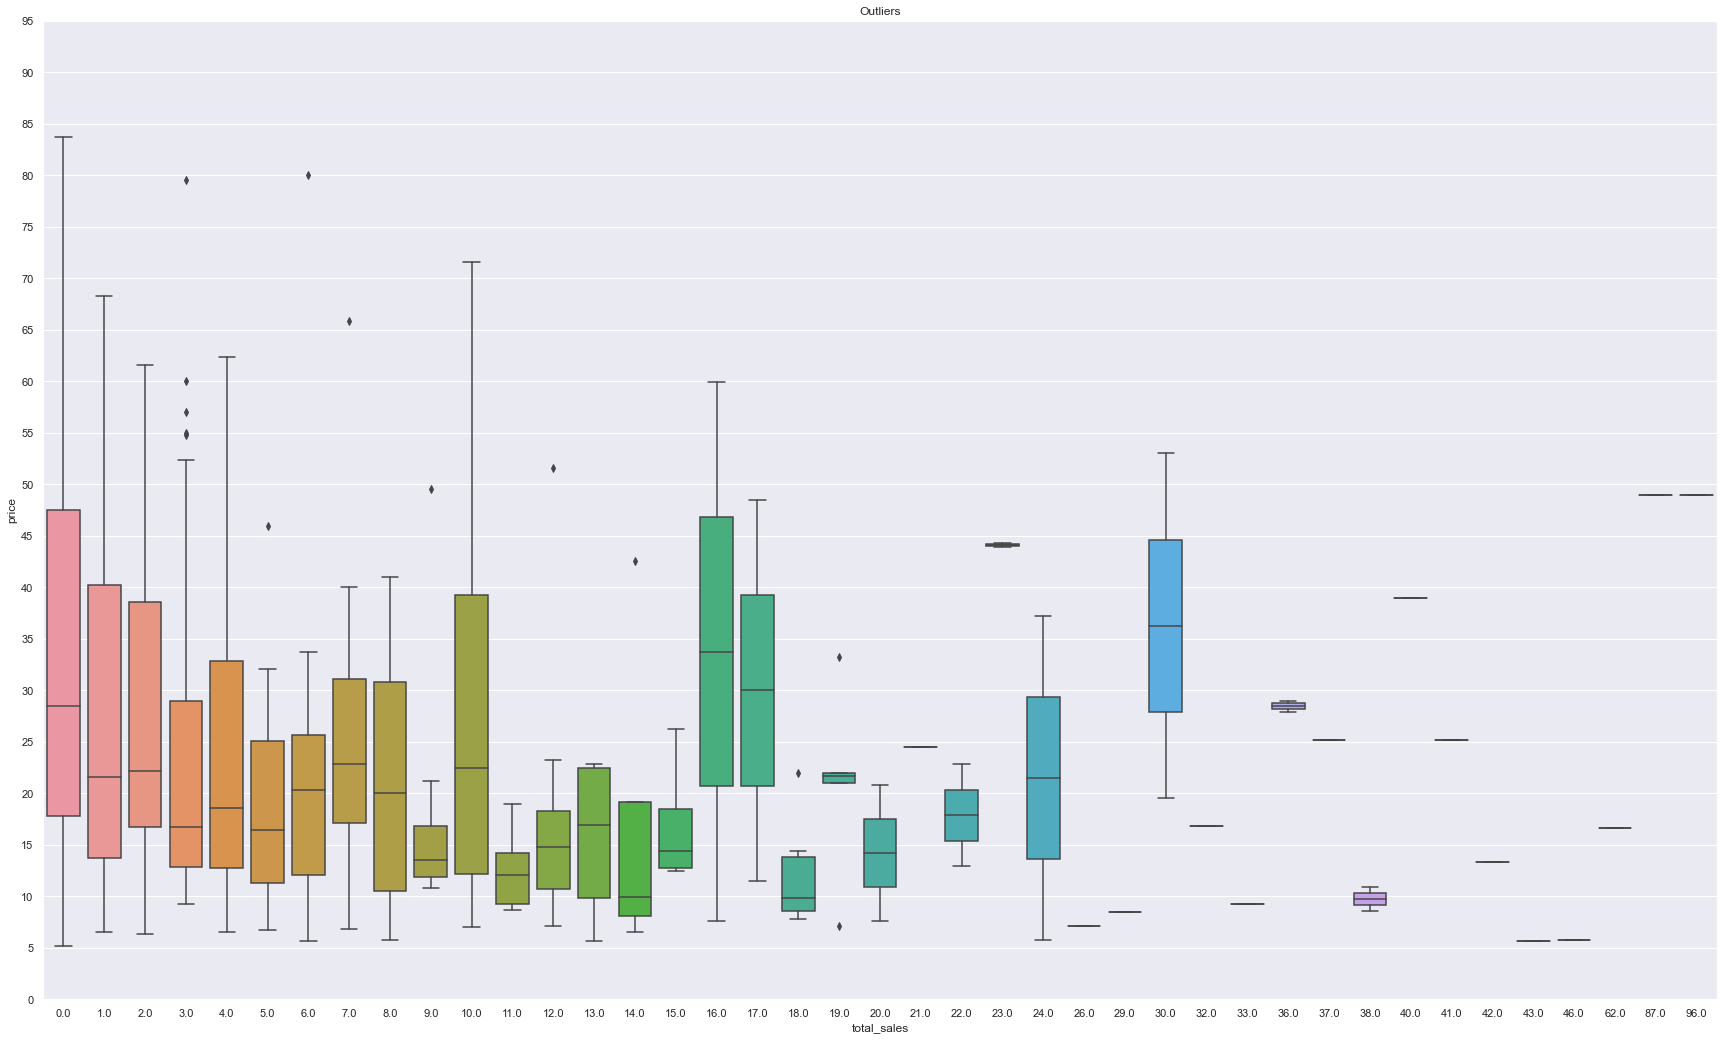

In [14]:
df_outlier_removed=remove_outlier_IQR(outliers.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=outliers.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    outliers_final=outliers.drop([ind_diff[i]])
    outliers=outliers_final
    
sns.boxplot(y='price', x='total_sales',data=outliers_final)
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 100, 5))
plt.ylabel('price')
plt.title('Outliers')
sns.set(rc={'figure.figsize':(30,18)})

In [15]:
list(ind_diff)

[4115,
 4132,
 4352,
 4355,
 4359,
 4402,
 4404,
 4406,
 4407,
 4582,
 4903,
 4904,
 5001,
 5007,
 5008,
 5025,
 5026,
 5070,
 5565,
 5612,
 5767,
 5892,
 5916,
 5917,
 5918,
 6126,
 6201,
 6202,
 6212,
 6213,
 6214,
 6215,
 6216]

In [16]:
len(ind_diff)

33

In [17]:
outliers_final.to_excel("outliers_final.xlsx")

In [18]:
#Continuous features
outliers_final.describe()

,total_sales,price
count,683.000000,683.000000
mean,4.128843,28.194876
std,8.666572,18.256450
min,0.000000,5.200000
25%,0.000000,13.700000
50%,1.000000,22.800000
75%,5.000000,39.000000
max,96.000000,83.700000


In [19]:
#Categorical features
outliers_final.total_sales.value_counts()

0.0     308
1.0      85
3.0      51
2.0      37
4.0      30
6.0      25
5.0      20
7.0      19
12.0     15
8.0      10
10.0     10
9.0      10
18.0      7
11.0      6
13.0      5
19.0      5
15.0      4
14.0      4
20.0      2
16.0      2
22.0      2
24.0      2
17.0      2
36.0      2
23.0      2
30.0      2
38.0      2
26.0      1
21.0      1
41.0      1
33.0      1
29.0      1
87.0      1
32.0      1
96.0      1
46.0      1
42.0      1
43.0      1
40.0      1
62.0      1
37.0      1
Name: total_sales, dtype: int64